In [1]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00


In [1]:
!pip uninstall -y numpy
!pip install numpy==1.24.3
!pip install gensim --force-reinstall

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 15.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninst

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3.1 Text Preprocessing, Tokenization, and Sequence Padding:

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
# --- 2. Download necessary NLTK resources ---
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
data = pd.read_csv('/content/drive/MyDrive/hatevsoffensive_language.csv')

In [6]:
# --- 4. Text cleaning function ---
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", '', text)                # Remove mentions and hashtags
    text = re.sub(r"[^A-Za-z\s]", '', text)              # Remove special characters & numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [8]:
# Download the required 'punkt_tab' resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
# --- 5. Apply text cleaning ---
data['cleaned_text'] = data['text'].apply(clean_text)

In [10]:
# --- 6. Label Mapping ---
label_mapping = {'hate speec': 0, 'offensive language': 1, 'neither': 2}
data['label_num'] = data['label'].map(label_mapping)

In [11]:
print(data['label'].value_counts())


label
offensive language    19190
neither                4163
hate speec             1430
Name: count, dtype: int64


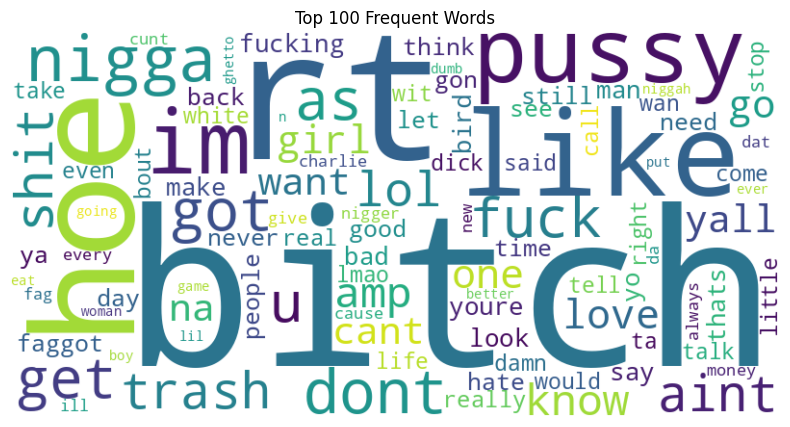

In [12]:
from collections import Counter

# Flatten all words into a single list
all_words_list = ' '.join(data['cleaned_text']).split()

# Count word frequencies
word_freq = Counter(all_words_list)

# Generate word cloud from frequency dict
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100)
wordcloud.generate_from_frequencies(word_freq)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Frequent Words')
plt.show()


In [13]:
# Check for NaN values in the 'label_num' column
print(data['label_num'].isna().sum())

# Drop rows where 'label_num' is NaN
data = data.dropna(subset=['label_num'])

# --- 8. Train/Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'],
    data['label_num'],
    test_size=0.2,
    random_state=42,
    stratify=data['label_num']
)


0


In [14]:
# --- 9. Tokenization ---
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [15]:
# --- 10. Padding (95th percentile) ---
train_seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(train_seq_lengths, 95))  # 95th percentile length

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [16]:
# --- 11. Print shapes ---
print("X_train_pad shape:", X_train_pad.shape)
print("X_test_pad shape:", X_test_pad.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Max sequence length (95th percentile):", max_len)

X_train_pad shape: (19826, 15)
X_test_pad shape: (4957, 15)
y_train shape: (19826,)
y_test shape: (4957,)
Max sequence length (95th percentile): 15


#3.2 Model Building and Training:

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [18]:
# Common hyperparameters
vocab_size = 10000
embedding_dim = 128
num_classes = 3  # hate speech, offensive, neither

In [19]:
# Early stopping and checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
checkpoint_rnn = ModelCheckpoint('best_rnn_model.h5', save_best_only=True, monitor='val_loss')

In [20]:
# Build Model 1
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(64),
    Dense(num_classes, activation='softmax')
])

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model 1
history_rnn = rnn_model.fit(
    X_train_pad, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint_rnn]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
494/496 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8254 - loss: 0.5101

496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8256 - loss: 0.5096 - val_accuracy: 0.8964 - val_loss: 0.2987
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9263 - loss: 0.2220 - val_accuracy: 0.8868 - val_loss: 0.3237
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9646 - loss: 0.1173 - val_accuracy: 0.8853 - val_loss: 0.3756
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9802 - loss: 0.0631 - val_accuracy: 0.8525 - val_loss: 0.4942
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.8601 - val_loss: 0.5364
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.8694 - val_loss: 0.5246
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.8538 - val_loss: 0.5744
Epoch 8/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 

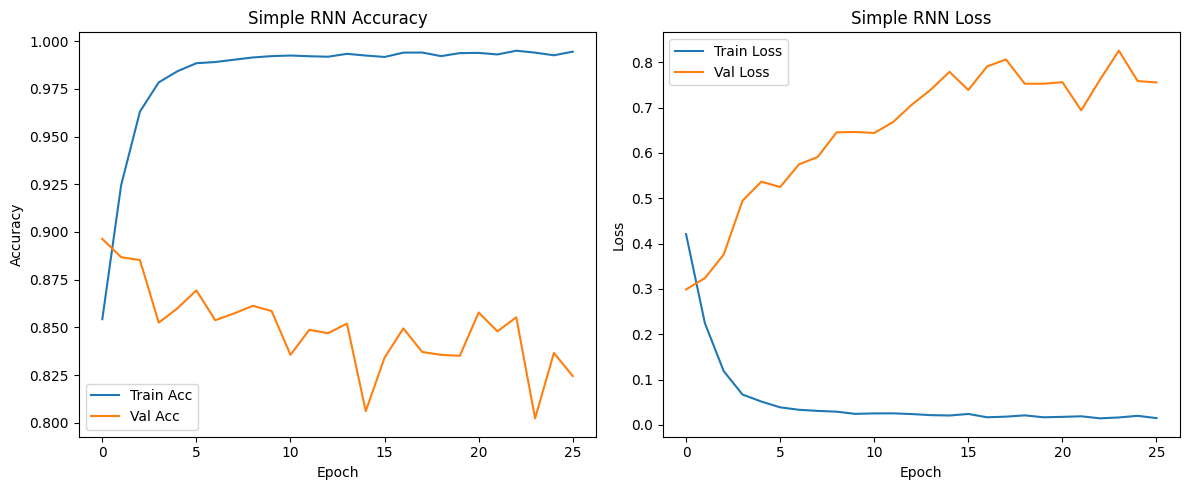

In [21]:
# --- Function to plot training history ---
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Plot for each model ---
plot_training_history(history_rnn, "Simple RNN")


In [22]:
checkpoint_lstm = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')

# Build Model 2
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model 2
history_lstm = lstm_model.fit(
    X_train_pad, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint_lstm]
)


Epoch 1/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8086 - loss: 0.5254

496/496 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8087 - loss: 0.5252 - val_accuracy: 0.8984 - val_loss: 0.2685
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9175 - loss: 0.2410 - val_accuracy: 0.8951 - val_loss: 0.2816
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9443 - loss: 0.1658 - val_accuracy: 0.8936 - val_loss: 0.2929
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9596 - loss: 0.1224 - val_accuracy: 0.8903 - val_loss: 0.3677
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9678 - loss: 0.0975 - val_accuracy: 0.8825 - val_loss: 0.4036
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9722 - loss: 0.0735 - val_accuracy: 0.8807 - val_loss: 0.4942
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9796 - loss: 0.0633 - val_accuracy: 0.8707 - val_loss: 0.4847
Epoch 8/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9821 - loss: 0.0494 - val_accurac

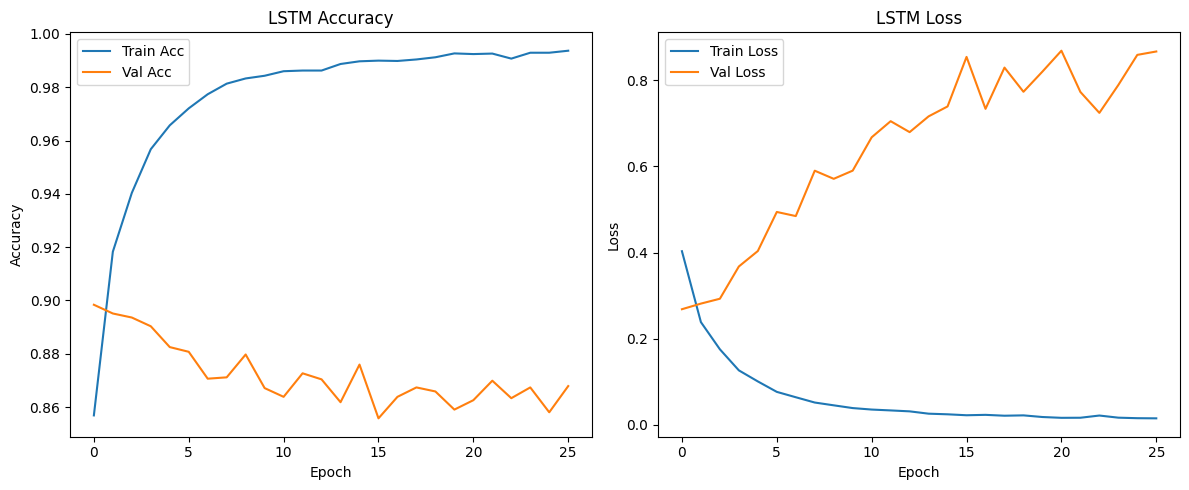

In [23]:
plot_training_history(history_lstm, "LSTM")

#3.3 Model Training and Evaluation

In [24]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [25]:
import gensim.downloader as api
model = api.load("glove-twitter-50")

[==================================================] 100.0% 199.5/199.5MB downloaded


In [26]:
# Load GloVe embeddings (50D)
word2vec = api.load("glove-twitter-50")

# Create embedding matrix
embedding_dim_word2vec = 50
embedding_matrix = np.zeros((vocab_size, embedding_dim_word2vec))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        if word in word2vec:
            embedding_matrix[i] = word2vec[word]


In [35]:
# Build Model 3
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
lstm_w2v_model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim_word2vec,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

lstm_w2v_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model 3
history_lstm_w2v = lstm_w2v_model.fit(
    X_train_pad, y_train,
    epochs=50,

    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


490/496 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8259 - loss: 0.4992

496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8264 - loss: 0.4977 - val_accuracy: 0.8880 - val_loss: 0.3106
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8879 - loss: 0.3127

496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8879 - loss: 0.3127 - val_accuracy: 0.9027 - val_loss: 0.2711
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8975 - loss: 0.2741 - val_accuracy: 0.8981 - val_loss: 0.2733
Epoch 4/50
494/496 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9011 - loss: 0.2676

496/496 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9010 - loss: 0.2676 - val_accuracy: 0.9054 - val_loss: 0.2549
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9042 - loss: 0.2558

496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9042 - loss: 0.2558 - val_accuracy: 0.9092 - val_loss: 0.2497
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9082 - loss: 0.2459 - val_accuracy: 0.8913 - val_loss: 0.3034
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9112 - loss: 0.2419 - val_accuracy: 0.9075 - val_loss: 0.2498
Epoch 8/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9149 - loss: 0.2268 - val_accuracy: 0.9075 - val_loss: 0.2506
Epoch 9/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9187 - loss: 0.2172 - val_accuracy: 0.9067 - val_loss: 0.2590
Epoch 10/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9193 - loss: 0.2103 - val_accuracy: 0.9112 - val_loss: 0.2527
Epoch 11/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9277 - loss: 0.1927 - val_accuracy: 0.9087 - val_loss: 0.2603
Epoch 12/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9302 - loss: 0.1862 - val_accuracy: 

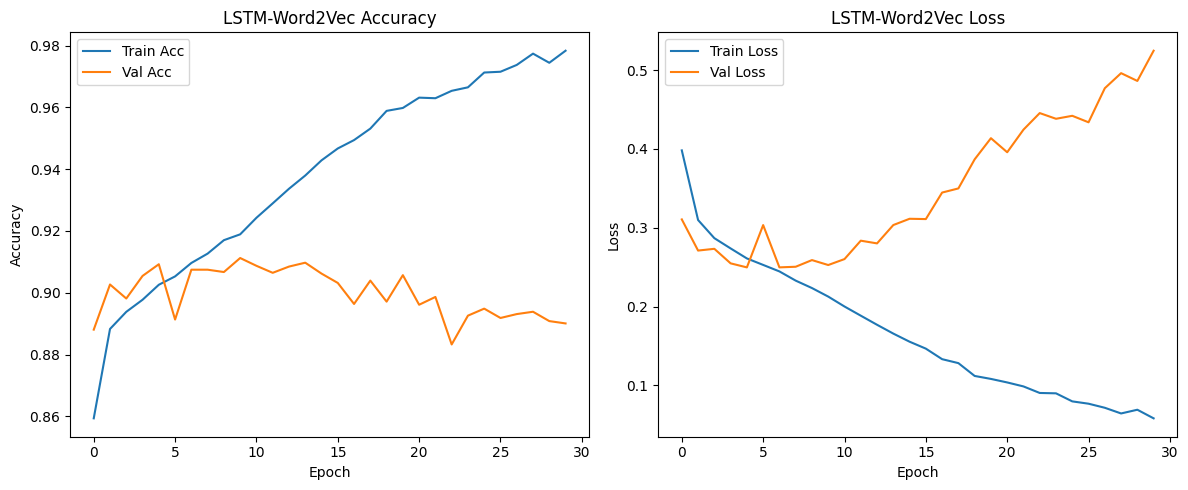

In [36]:
plot_training_history(history_lstm_w2v, "LSTM-Word2Vec")

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Simple RNN Accuracy: 0.8862


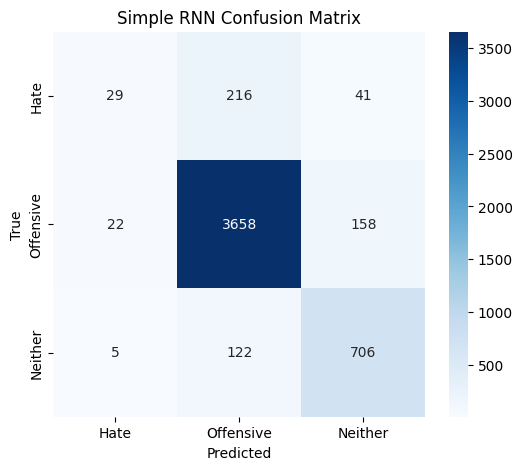

Simple RNN Classification Report:
              precision    recall  f1-score   support

        Hate       0.52      0.10      0.17       286
   Offensive       0.92      0.95      0.93      3838
     Neither       0.78      0.85      0.81       833

    accuracy                           0.89      4957
   macro avg       0.74      0.63      0.64      4957
weighted avg       0.87      0.89      0.87      4957

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM Accuracy: 0.8905


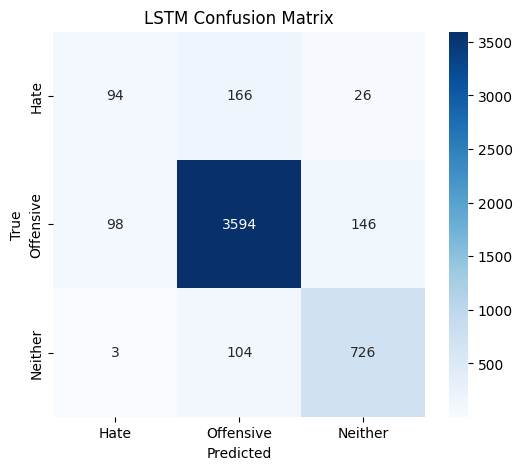

LSTM Classification Report:
              precision    recall  f1-score   support

        Hate       0.48      0.33      0.39       286
   Offensive       0.93      0.94      0.93      3838
     Neither       0.81      0.87      0.84       833

    accuracy                           0.89      4957
   macro avg       0.74      0.71      0.72      4957
weighted avg       0.88      0.89      0.89      4957

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM + Word2Vec Accuracy: 0.8961


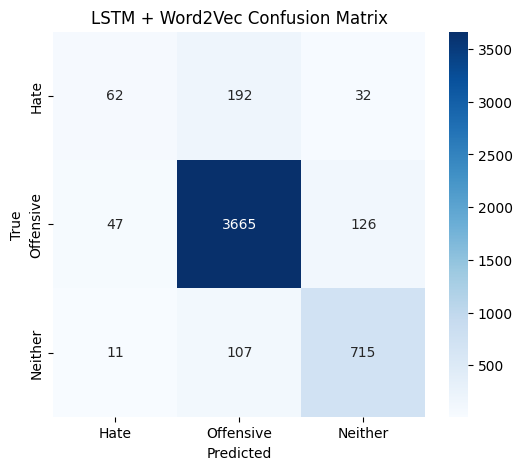

LSTM + Word2Vec Classification Report:
              precision    recall  f1-score   support

        Hate       0.52      0.22      0.31       286
   Offensive       0.92      0.95      0.94      3838
     Neither       0.82      0.86      0.84       833

    accuracy                           0.90      4957
   macro avg       0.75      0.68      0.69      4957
weighted avg       0.88      0.90      0.89      4957



In [38]:


# --- Function to evaluate any model ---
def evaluate_model(model, X_test_pad, y_test, model_name):
    # Predict
    y_pred = model.predict(X_test_pad)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # True labels
    y_true = y_test

    # Accuracy
    acc = accuracy_score(y_true, y_pred_classes)
    print(f"{model_name} Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hate', 'Offensive', 'Neither'], yticklabels=['Hate', 'Offensive', 'Neither'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred_classes, labels=[0, 1, 2], target_names=['Hate', 'Offensive', 'Neither']))

# --- Evaluate all 3 models ---
evaluate_model(rnn_model, X_test_pad, y_test, "Simple RNN")
evaluate_model(lstm_model, X_test_pad, y_test, "LSTM")
evaluate_model(lstm_w2v_model, X_test_pad, y_test, "LSTM + Word2Vec")


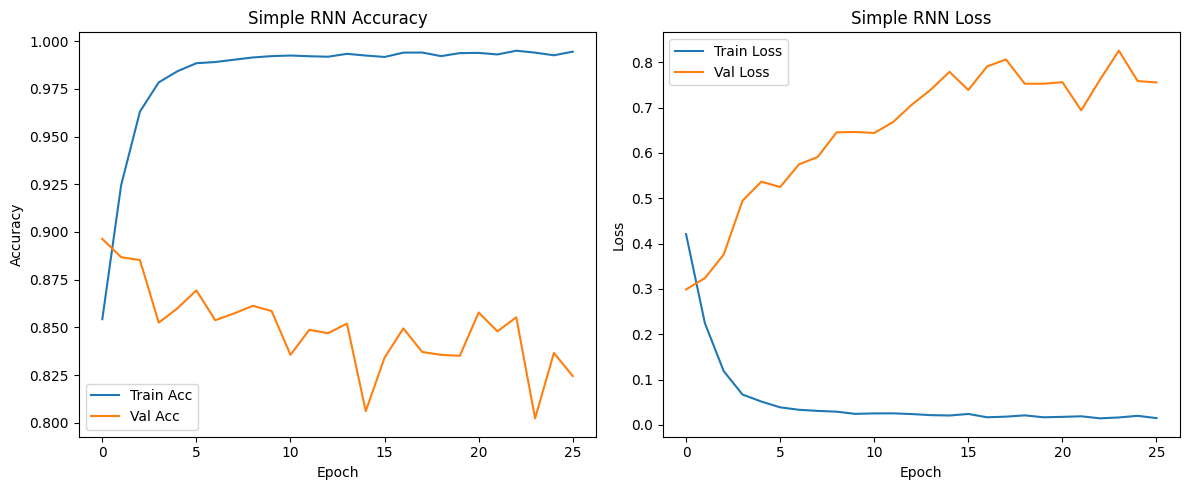

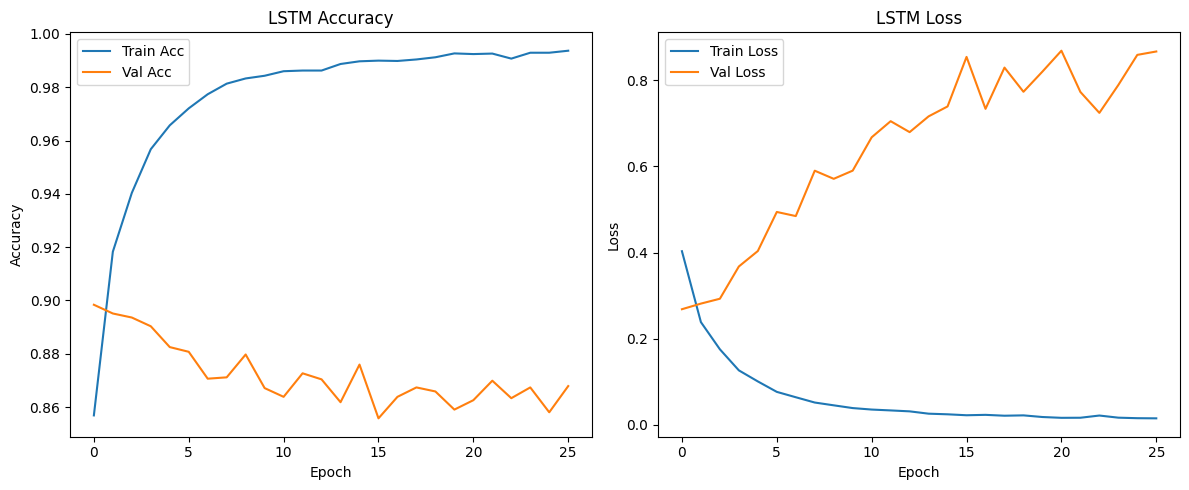

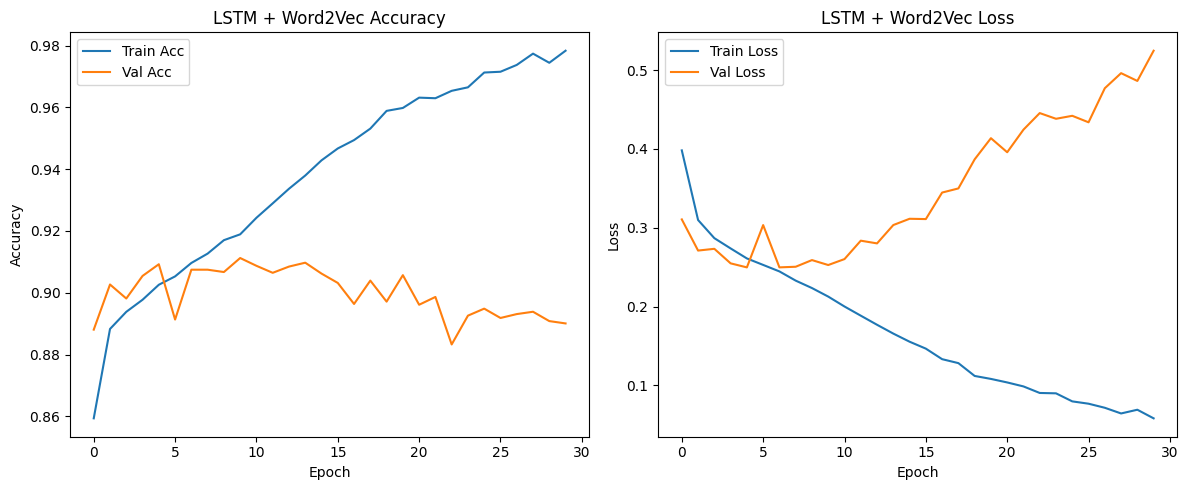

In [39]:
# --- Function to plot training history ---
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Plot for each model ---
plot_training_history(history_rnn, "Simple RNN")
plot_training_history(history_lstm, "LSTM")
plot_training_history(history_lstm_w2v, "LSTM + Word2Vec")


#3.4 GUI for Real Time Prediction:

In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
import re

# --- Load trained model ---
best_model = load_model('best_model.h5')

# --- Load tokenizer ---
# Ttokenizer used when preparing the training data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['cleaned_text'])

# --- Text cleaning function ---
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", '', text)                # Remove mentions and hashtags
    text = re.sub(r"[^A-Za-z\s]", '', text)              # Remove special characters & numbers
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [41]:
# --- Prediction function ---
def predict_hate_speech(text):
    cleaned_text = clean_text(text)
    text_seq = tokenizer.texts_to_sequences([cleaned_text])
    max_len = 15  # This is the 95th percentile length
    text_pad = pad_sequences(text_seq, maxlen=max_len, padding='post', truncating='post')

    prediction = best_model.predict(text_pad)
    label_map = {0: "Hate Speec", 1: "Offensive Language", 2: "Neither"}

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)[0]
    return label_map[predicted_class]

In [42]:
import gradio as gr

iface = gr.Interface(
    fn=predict_hate_speech,  # The function that makes predictions
    inputs=gr.Textbox(label="Enter Tweet"),  # Input type (textbox for text input)
    outputs=gr.Textbox(label="Prediction"),  # Output type (textbox for result)
    live=True,
    title="Hate Speech Detection",
    description="Enter a tweet to classify it as 'Hate Speech', 'Offensive Language', or 'Neither'."
)


iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3fc16172448e758161.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
